In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.stats as st

In [2]:
fbins=np.linspace(0,197/2,int(1+4096/2))
timebins = (1/60)*np.asarray(range(1440))

## Inspect the first and last snapshots in the scan

In [3]:
snapshot=np.load("snapshots/scan24hour/single_board_snapshot1630819418.078231.npy")

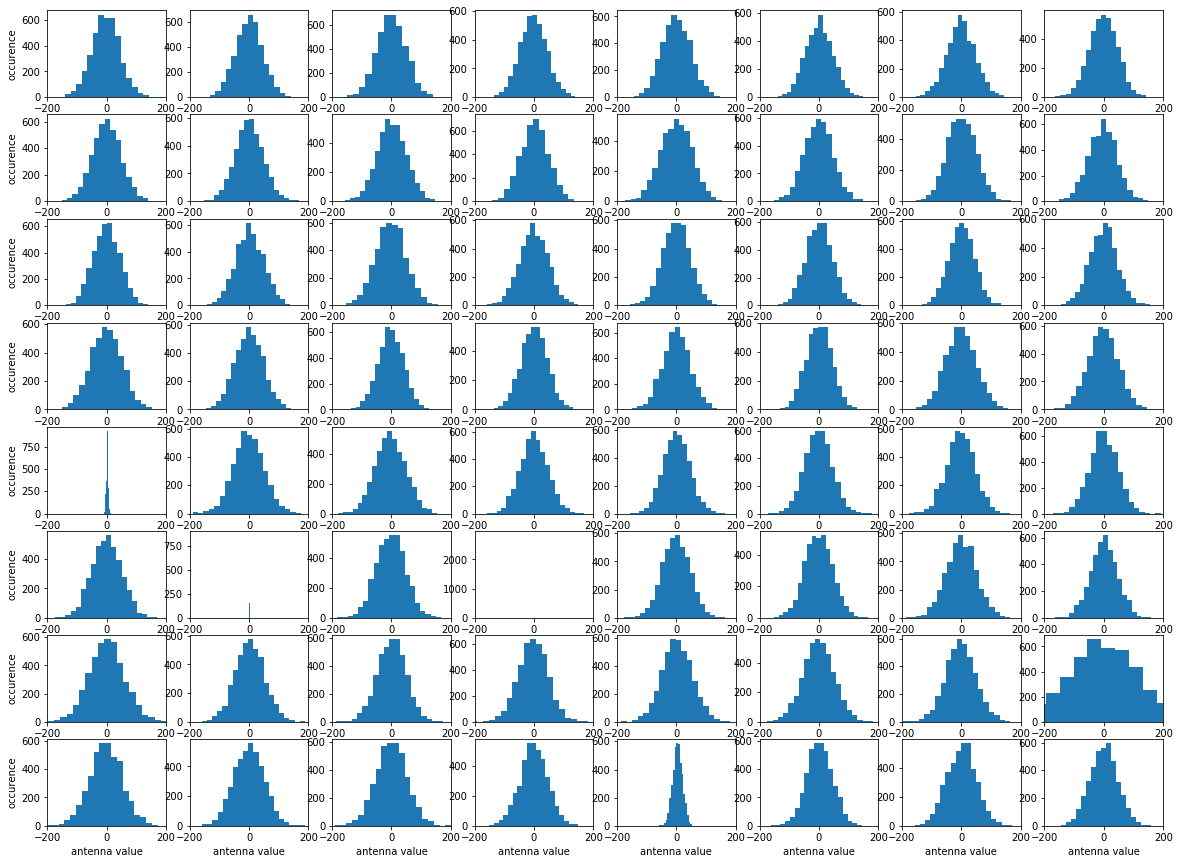

In [4]:
#plot histogram
plt.figure(figsize=(20,15))
for i in range(64):
    plt.subplot(8,8,1+i)
    plt.hist(snapshot[:,i+4],20)
    plt.xlim(-200,200)
    if i > 55:
        plt.xlabel('antenna value')
    if i%8==0:
        plt.ylabel('occurence')

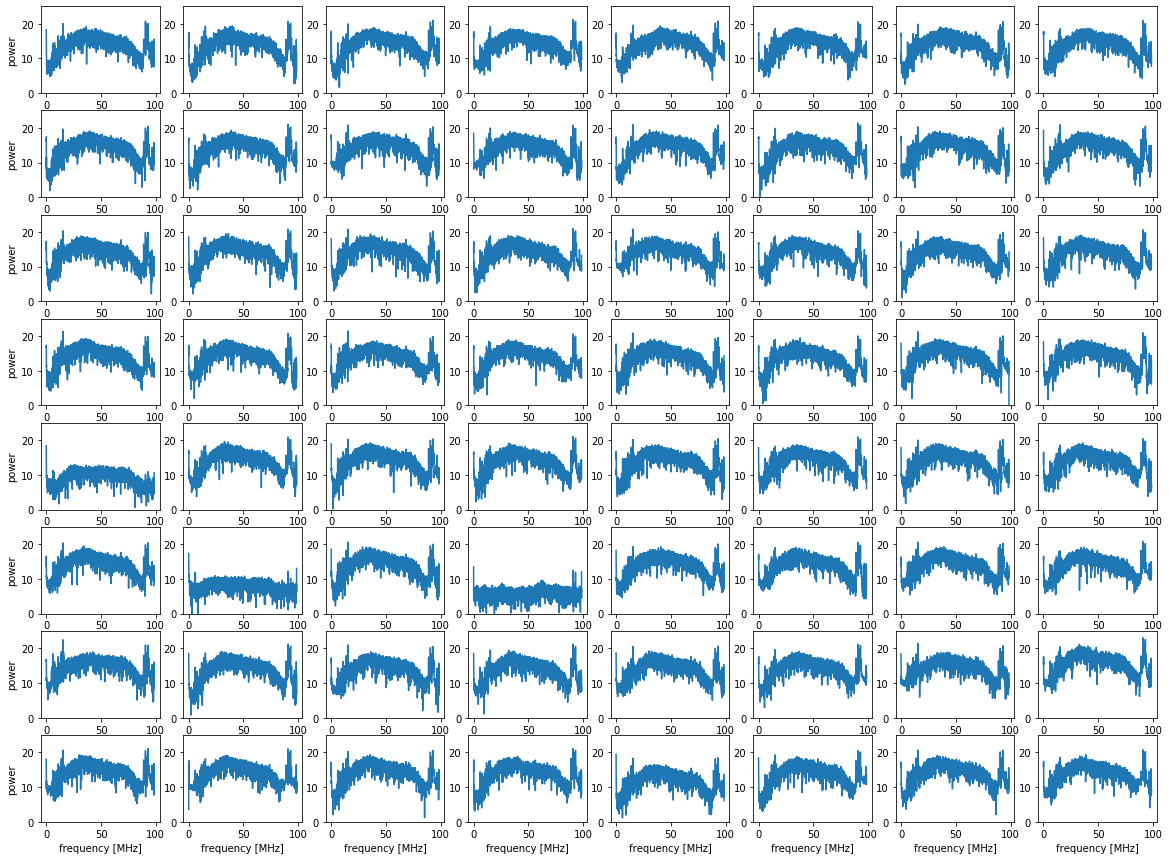

In [5]:
#plot spectra
fbins=np.linspace(0,197/2,int(1+4096/2))

plt.figure(figsize=(20,15))
for i in range(64):
    plt.subplot(8,8,1+i)
    spec=np.fft.rfft(snapshot[:,i+4])
    plt.plot(fbins,np.log(np.square(np.abs(spec))))
    plt.ylim(0,25)
    if i > 55:
        plt.xlabel('frequency [MHz]')
    if i%8==0:
        plt.ylabel('power')

### Last snapshot

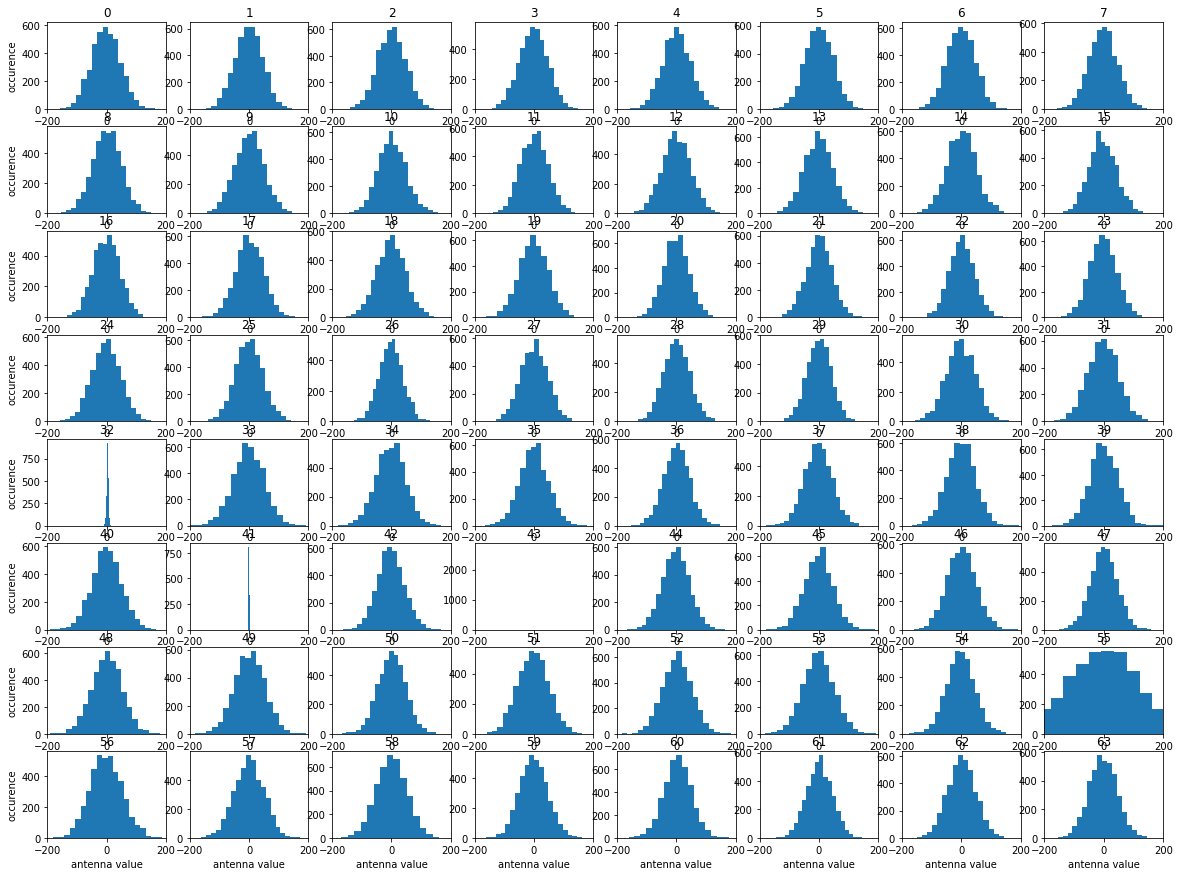

In [6]:
snapshot=np.load("snapshots/scan24hour/single_board_snapshot1630907420.5314093.npy")
#plot histogram
plt.figure(figsize=(20,15))
for i in range(64):
    plt.subplot(8,8,1+i)
    plt.title(i)
    plt.hist(snapshot[:,i+4],20)
    plt.xlim(-200,200)
    if i > 55:
        plt.xlabel('antenna value')
    if i%8==0:
        plt.ylabel('occurence')

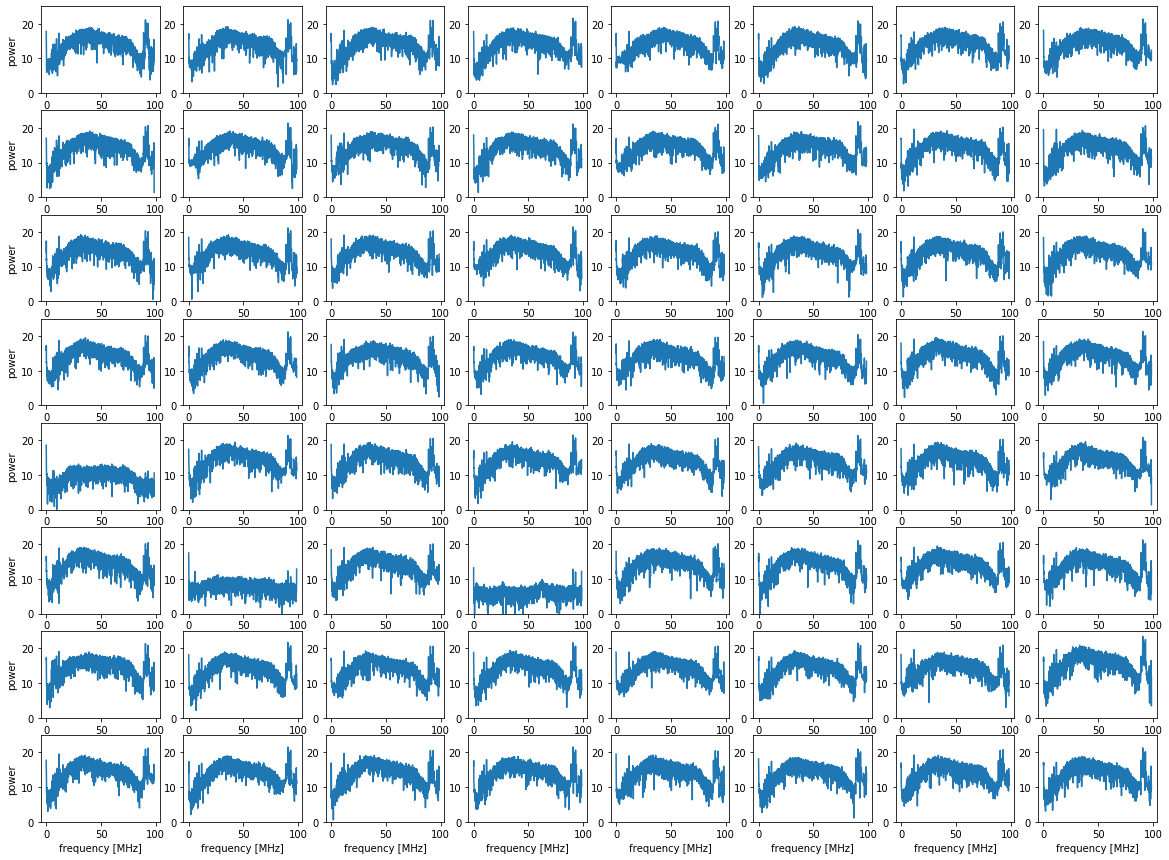

In [7]:
#plot spectra
fbins=np.linspace(0,197/2,int(1+4096/2))

plt.figure(figsize=(20,15))
for i in range(64):
    plt.subplot(8,8,1+i)
    spec=np.fft.rfft(snapshot[:,i+4])
    plt.plot(fbins,np.log(np.square(np.abs(spec))))
    plt.ylim(0,25)
    if i > 55:
        plt.xlabel('frequency [MHz]')
    if i%8==0:
        plt.ylabel('power')

## Waterfall plots

In [8]:
with open("ls_snapshots.txt") as f:
    fnames=f.readlines()

In [9]:
Nchan=2049
Nant = 64
Nsnapshot = 1440


dynamicspectra=np.zeros((Nchan,Nsnapshot,Nant))
maxtimeseries =np.zeros((Nsnapshot,Nant))
with open("ls_snapshots.txt") as f:
    fnames=f.readlines()
    
for j in range(Nsnapshot):
    fname=fnames[j][:-1]
    snapshot=np.load("snapshots/scan24hour/"+fname)
    for i in range(Nant):
        timeseries = snapshot[:,i+4]
        maxtimeseries[j,i]=np.max(np.abs(timeseries))
        spec=np.fft.rfft(timeseries)
        logpower = np.log(np.square(np.abs(spec)))
        dynamicspectra[:,j,i] = logpower


/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


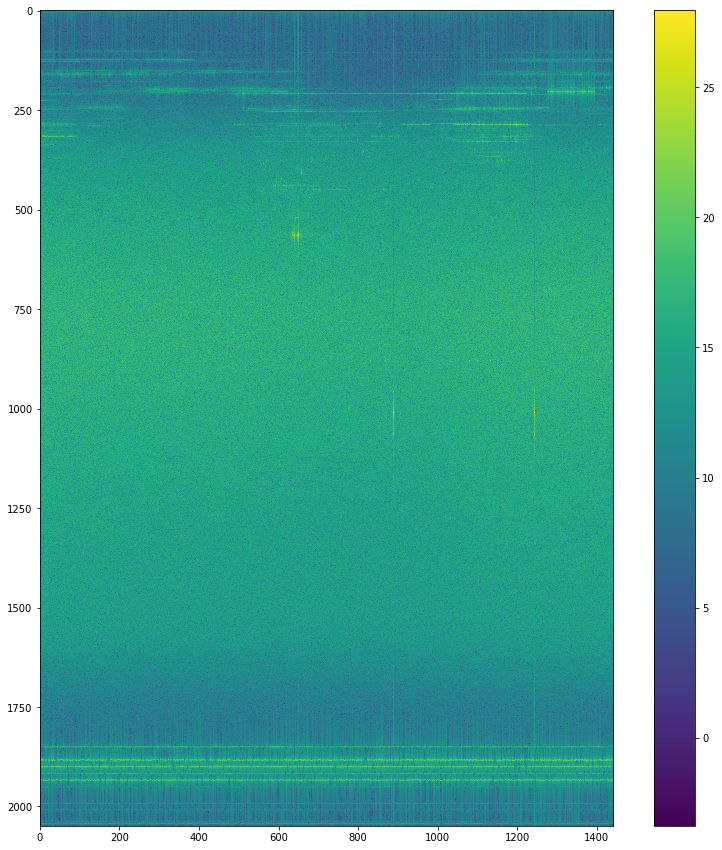

In [10]:
plt.figure(figsize=(15,15))
plt.imshow(dynamicspectra[:,:,0],interpolation='None')
plt.colorbar()

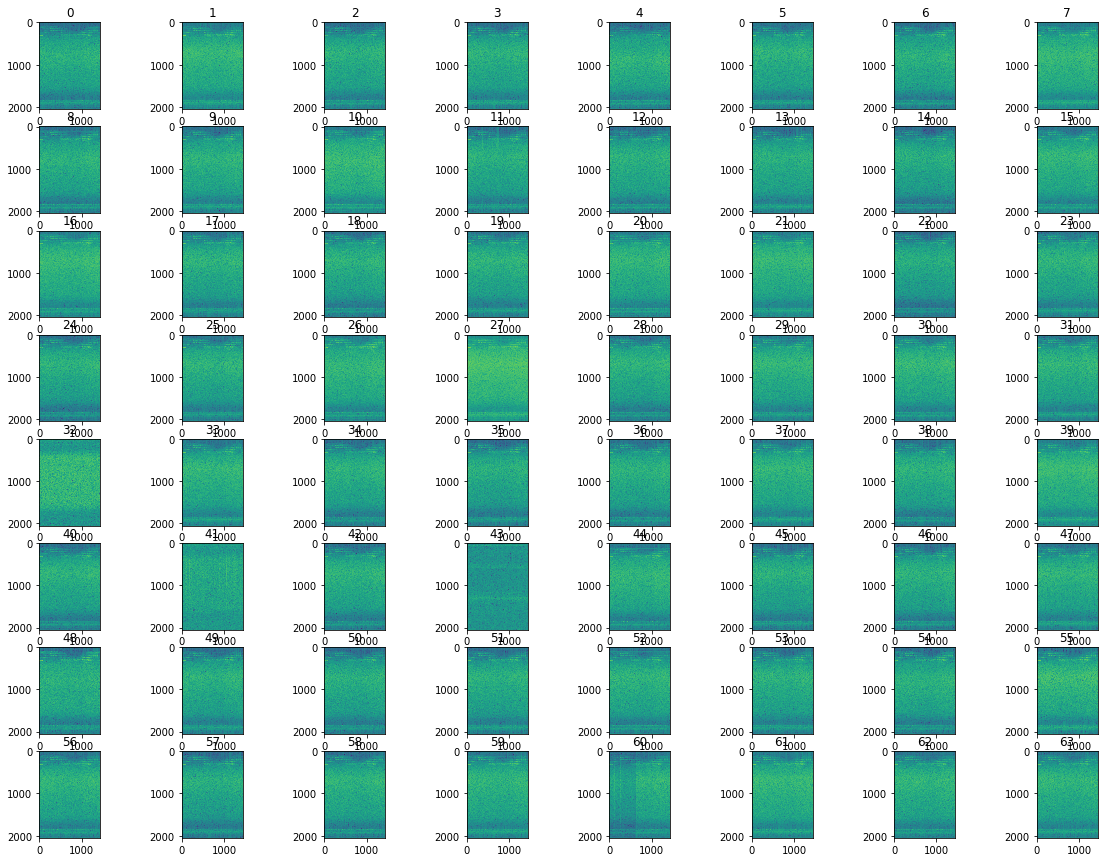

In [11]:
plt.figure(figsize=(20,15))
for i in range(64):
    plt.subplot(8,8,1+i)
    plt.imshow(dynamicspectra[:,:,i],interpolation='None')
    plt.title(i)

plt.show()
    
    

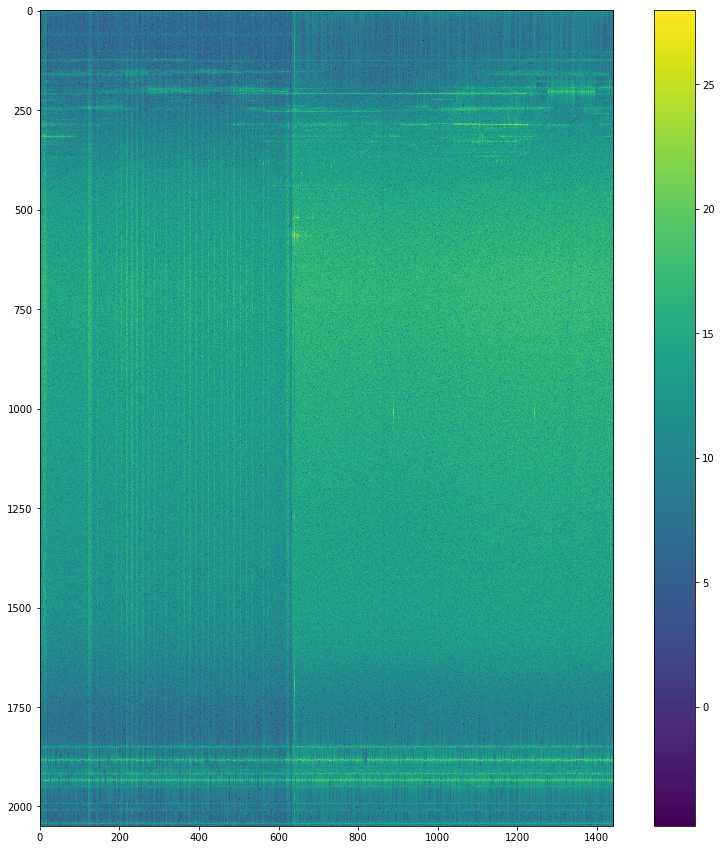

In [12]:
plt.figure(figsize=(15,15))
plt.imshow(dynamicspectra[:,:,60],interpolation='None')
plt.colorbar()

### work on time axis label

In [13]:
print( fnames[0])

single_board_snapshot1630819418.078231.npy



In [14]:
name='single_board_snapshot1630819418.078231.npy'
t=float(name[-21:-4])
utcstruct=time.gmtime(t)
print(time.asctime(utcstruct))
print(utcstruct)

Sun Sep  5 05:23:38 2021
time.struct_time(tm_year=2021, tm_mon=9, tm_mday=5, tm_hour=5, tm_min=23, tm_sec=38, tm_wday=6, tm_yday=248, tm_isdst=0)


Pacific time is UTC - 7, so first snapshot was at 10:23pm on the 4th. This was 97 minutes before midnight.

In [15]:
timesteps = np.asarray(range(1440))
minutes_since_midnight = timesteps - 97
hours_since_midnight = (1/60)*minutes_since_midnight

## Timeseries standard deviation over time

In [16]:
Nant = 64
Nsnapshot = 1440


sdevs=np.zeros((Nsnapshot,Nant))
with open("ls_snapshots.txt") as f:
    fnames=f.readlines()
    
for j in range(Nsnapshot):
    fname=fnames[j][:-1]
    snapshot=np.load("snapshots/scan24hour/"+fname)
    for i in range(Nant):
        sdevs[j,i]=np.std(snapshot[:,i+4])
     

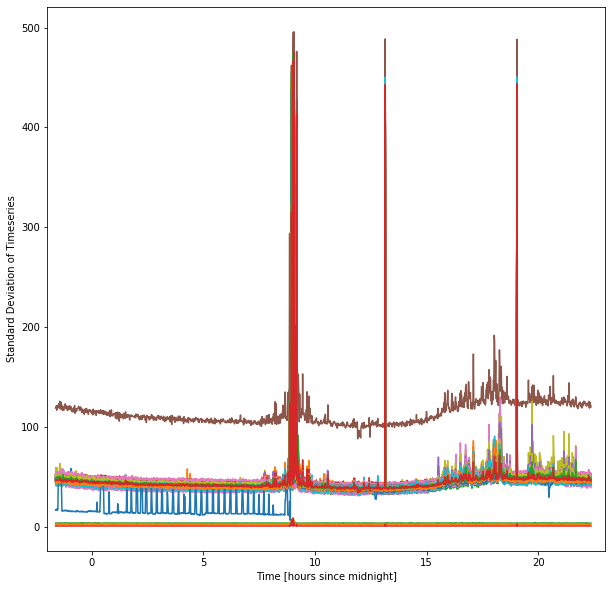

In [17]:
plt.figure(figsize=(10,10))
for i in range(64):
    plt.plot(hours_since_midnight,sdevs[:,i])
    plt.xlabel("Time [hours since midnight]")
    plt.ylabel("Standard Deviation of Timeseries")
    plt.xlim(-2,23)
plt.show()

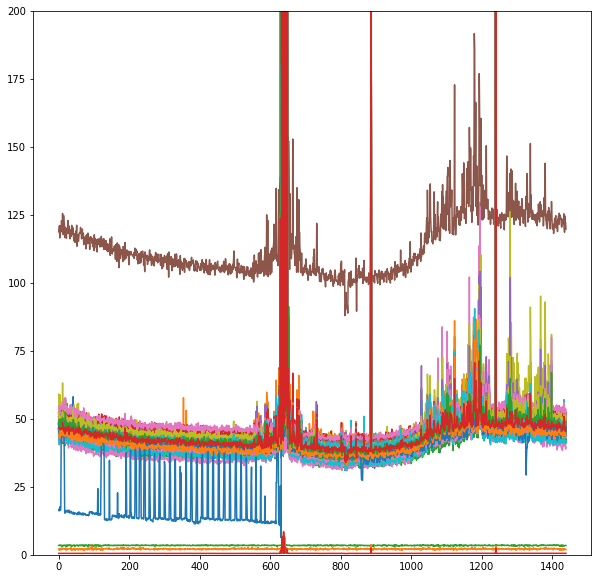

In [18]:
plt.figure(figsize=(10,10))
for i in range(64):
    plt.plot(sdevs[:,i])
    plt.ylim(0,200)
plt.show()

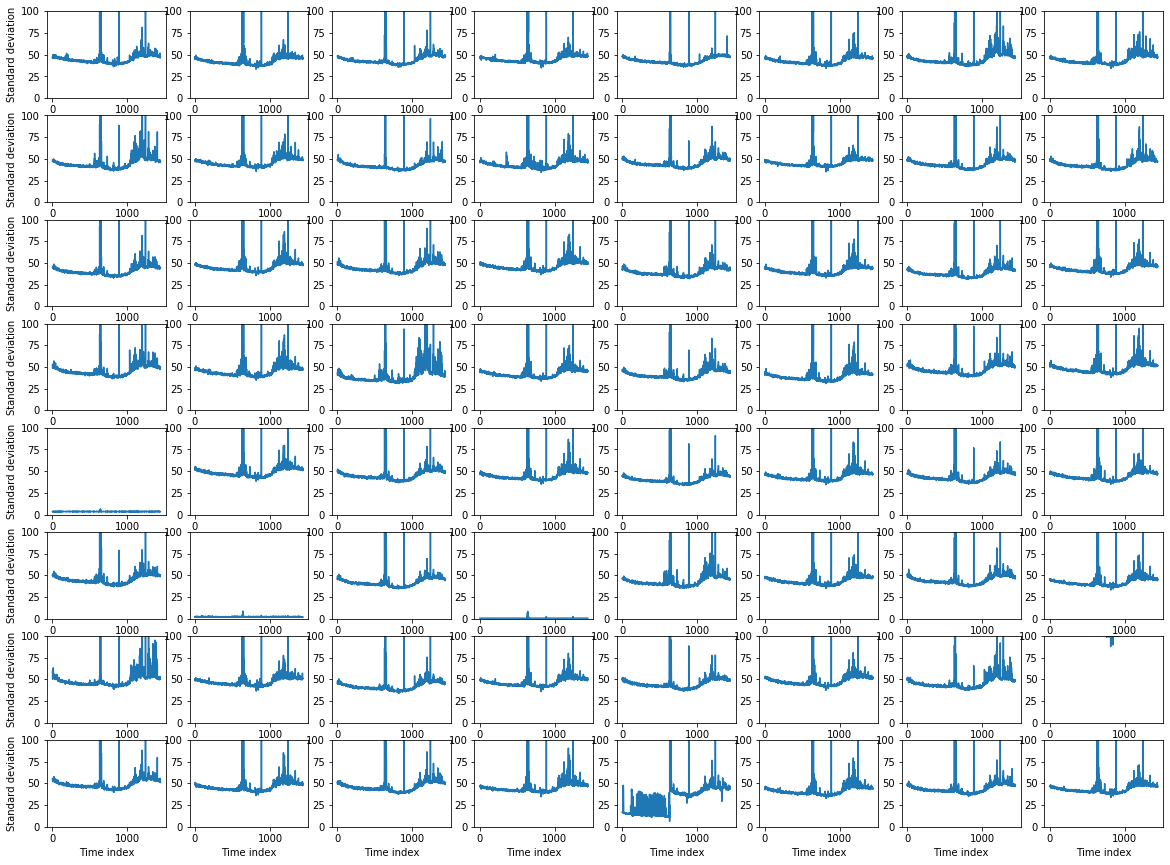

In [19]:
#Y axis is limited to show detail
plt.figure(figsize=(20,15))
for i in range(64):
    plt.subplot(8,8,1+i)
    plt.plot(sdevs[:,i])
    plt.ylim(0,100)
    if i > 55:
        plt.xlabel('Time index')
    if i%8==0:
        plt.ylabel('Standard deviation')

## Kurtosis
Fourth moment divided by variance squared.  Scipy is using Fisher definition which then subtracts 3, such that the result is zero for a Gaussian distribution.

In [20]:
Nant = 64
Nsnapshot = 1440


kurtosis=np.zeros((Nsnapshot,Nant))
with open("ls_snapshots.txt") as f:
    fnames=f.readlines()
    
for j in range(Nsnapshot):
    fname=fnames[j][:-1]
    snapshot=np.load("snapshots/scan24hour/"+fname)
    for i in range(Nant):
        kurtosis[j,i]=st.kurtosis(snapshot[:,i+4])

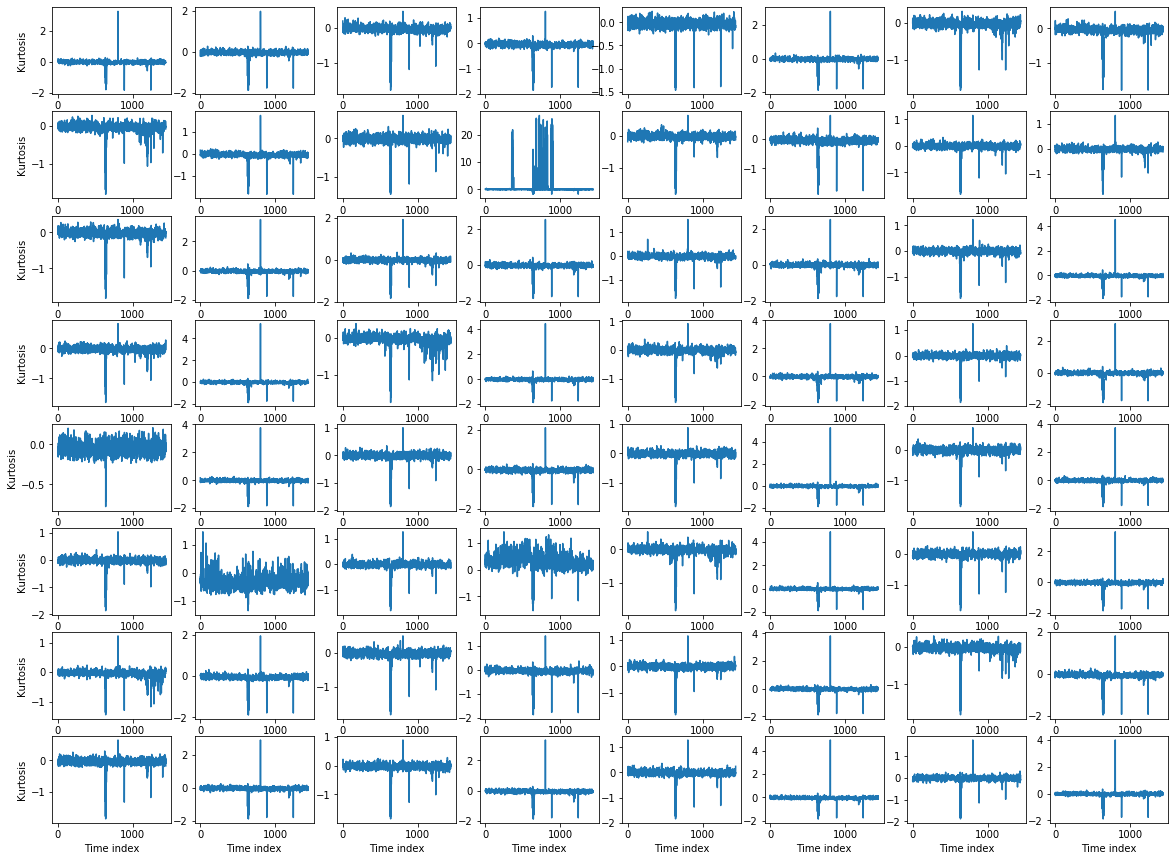

In [21]:
#plt.figure(figsize=(10,10))
#for i in range(64):
#    plt.plot(kurtosis[:,i])
#plt.show()

plt.figure(figsize=(20,15))
for i in range(64):
    plt.subplot(8,8,1+i)
    plt.plot(kurtosis[:,i])
    if i > 55:
        plt.xlabel('Time index')
    if i%8==0:
        plt.ylabel('Kurtosis')

## Skewness

In [22]:
Nant = 64
Nsnapshot = 1440


skewness=np.zeros((Nsnapshot,Nant))
with open("ls_snapshots.txt") as f:
    fnames=f.readlines()
    
for j in range(Nsnapshot):
    fname=fnames[j][:-1]
    snapshot=np.load("snapshots/scan24hour/"+fname)
    for i in range(Nant):
        skewness[j,i]=st.skew(snapshot[:,i+4])

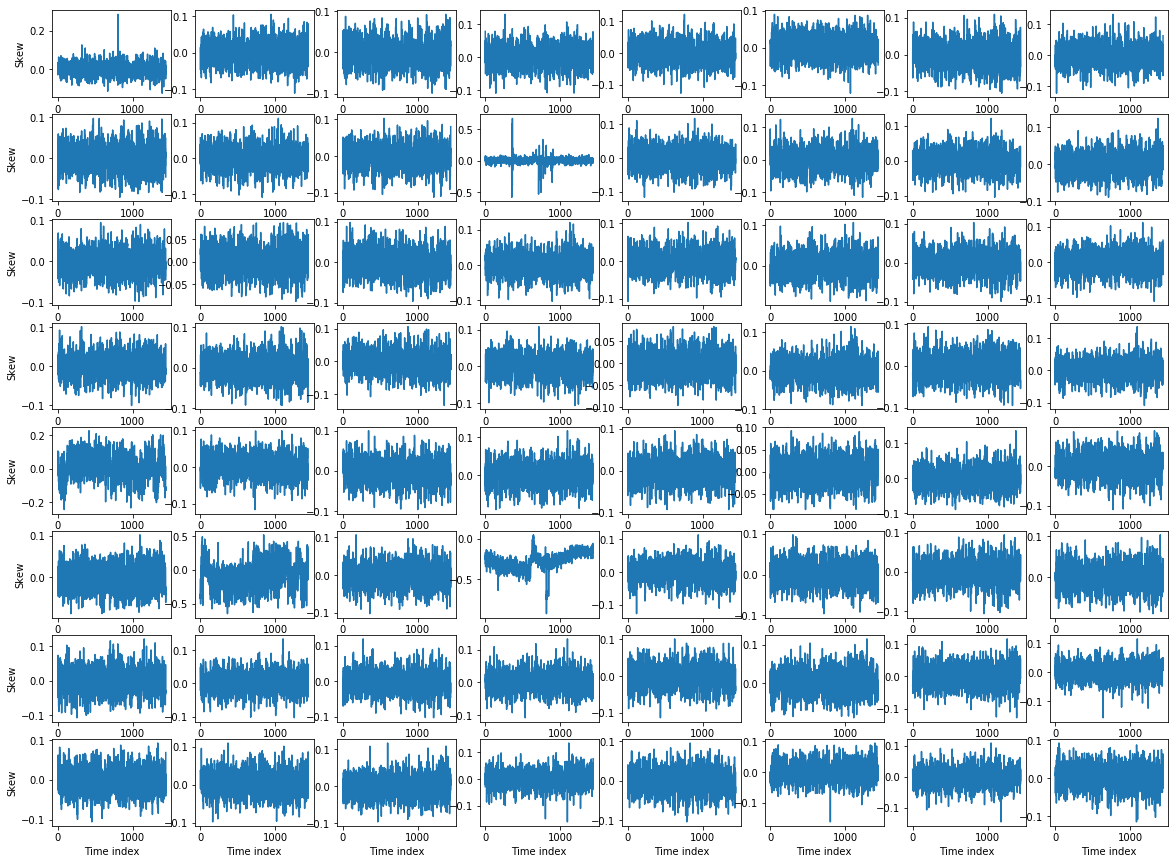

In [23]:
plt.figure(figsize=(20,15))
for i in range(64):
    plt.subplot(8,8,1+i)
    plt.plot(skewness[:,i])
    if i > 55:
        plt.xlabel('Time index')
    if i%8==0:
        plt.ylabel('Skew')

Why did the RFI affect one antenna so much stronger as evident in skewness and kurtosis plots (fourth column, second row?

## Examine antenna 11, which stands out in skewness and kurtosis plots:

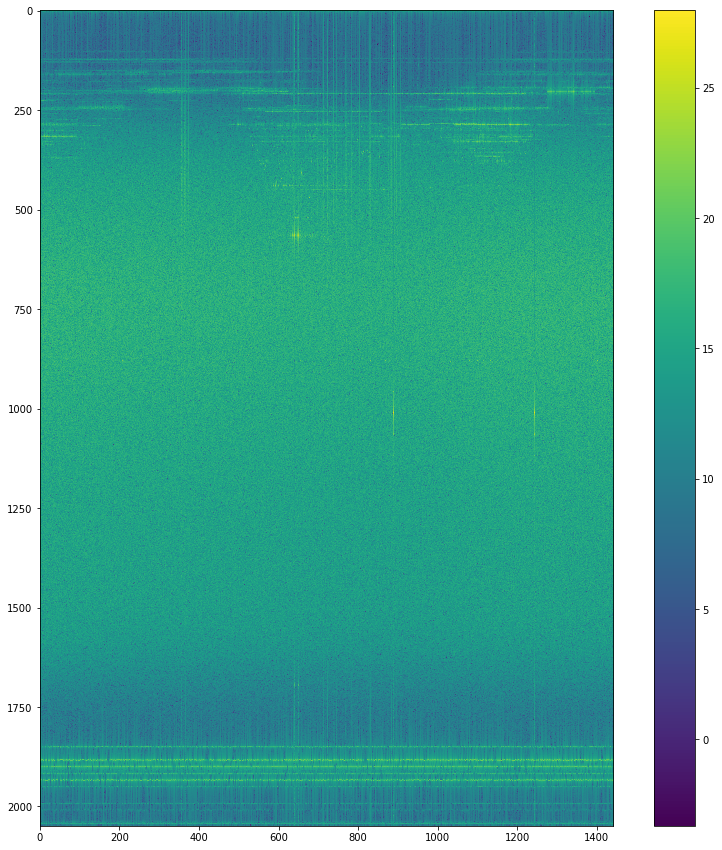

In [24]:
plt.figure(figsize=(15,15))
plt.imshow(dynamicspectra[:,:,11],interpolation='None')
plt.colorbar()

In [25]:
#plt.figure(figsize=(15,15))
#plt.imshow(dynamicspectra[750:1250,250:450,13],interpolation='None')
#plt.colorbar()

#special times are
#635-655
#883-889
#1238-1242


1882
140.0
565
512.0
1011
512.0
1011
2049
512.0


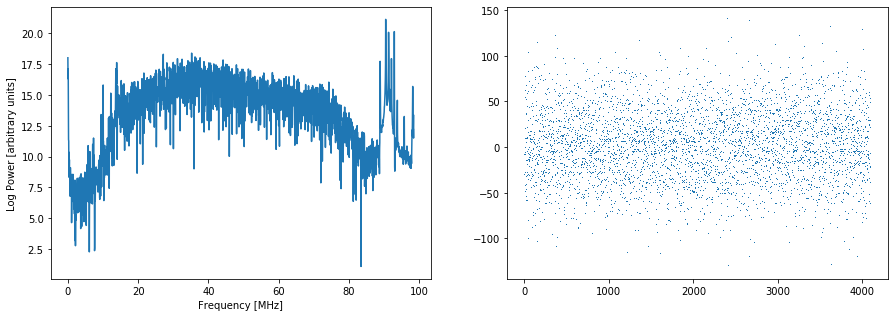

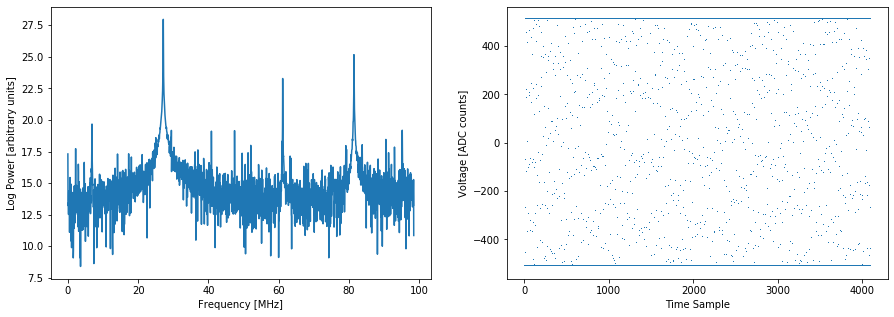

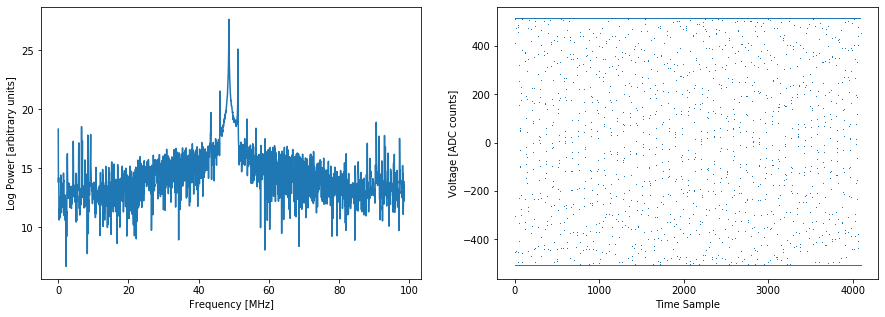

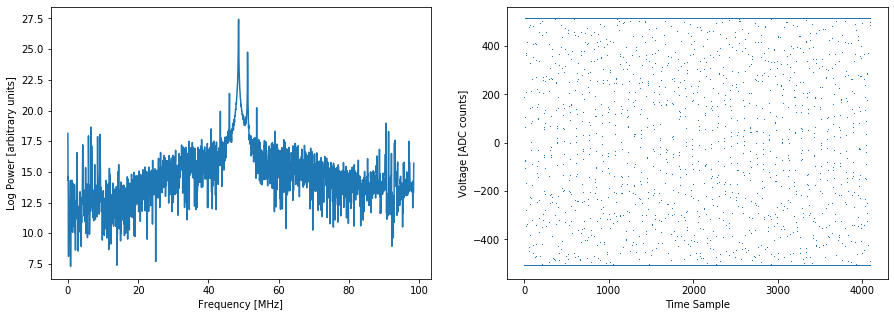

In [26]:
antennaindex=11

#a normal time
timeindex=700
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.xlabel("Frequency [MHz]")
plt.ylabel("Log Power [arbitrary units]")
plt.plot(fbins,dynamicspectra[:,timeindex,antennaindex])
print(np.argmax(dynamicspectra[:,timeindex,antennaindex]))
plt.subplot(122)
with open("ls_snapshots.txt") as f:
    fnames=f.readlines()
fname=fnames[timeindex][:-1]
snapshot=np.load("snapshots/scan24hour/"+fname)
plt.plot(snapshot[:,antennaindex+4],',')
print(np.max(np.abs(snapshot[:,antennaindex+4])))

#a bad time
timeindex=641
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.xlabel("Frequency [MHz]")
plt.ylabel("Log Power [arbitrary units]")
plt.plot(fbins,dynamicspectra[:,timeindex,antennaindex])
print(np.argmax(dynamicspectra[:,timeindex,antennaindex]))
plt.subplot(122)
plt.xlabel("Time Sample")
plt.ylabel("Voltage [ADC counts]")
with open("ls_snapshots.txt") as f:
    fnames=f.readlines()
fname=fnames[timeindex][:-1]
snapshot=np.load("snapshots/scan24hour/"+fname)
plt.plot(snapshot[:,antennaindex+4],',')
print(np.max(np.abs(snapshot[:,antennaindex+4])))

#a bad time
timeindex=886
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.xlabel("Frequency [MHz]")
plt.ylabel("Log Power [arbitrary units]")
plt.plot(fbins,dynamicspectra[:,timeindex,antennaindex])
print(np.argmax(dynamicspectra[:,timeindex,antennaindex]))
plt.subplot(122)
plt.xlabel("Time Sample")
plt.ylabel("Voltage [ADC counts]")
fname=fnames[timeindex][:-1]
snapshot=np.load("snapshots/scan24hour/"+fname)
plt.plot(snapshot[:,antennaindex+4],',')
print(np.max(np.abs(snapshot[:,antennaindex+4])))

#a bad time
timeindex=1240
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.xlabel("Frequency [MHz]")
plt.ylabel("Log Power [arbitrary units]")
plt.plot(fbins,dynamicspectra[:,timeindex,antennaindex])

print(np.argmax(dynamicspectra[:,timeindex,antennaindex]))
print(len(dynamicspectra[:,timeindex,antennaindex]))
plt.subplot(122)
plt.xlabel("Time Sample")
plt.ylabel("Voltage [ADC counts]")
fname=fnames[timeindex][:-1]
snapshot=np.load("snapshots/scan24hour/"+fname)
plt.plot(snapshot[:,antennaindex+4],',')
print(np.max(np.abs(snapshot[:,antennaindex+4])))


What does the saturated timeseries look like zoomed in on a smaller portion?

(100, 110)

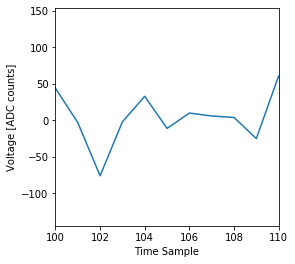

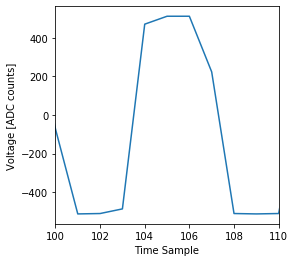

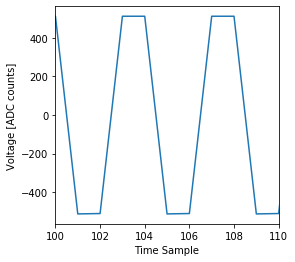

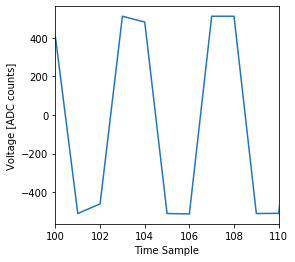

In [27]:
antennaindex=11
xmin=100
xmax=110
marker='-'

#a normal time
timeindex=700
plt.figure(figsize=(4,4))
plt.xlabel("Time Sample")
plt.ylabel("Voltage [ADC counts]")
with open("ls_snapshots.txt") as f:
    fnames=f.readlines()
fname=fnames[timeindex][:-1]
snapshot=np.load("snapshots/scan24hour/"+fname)
plt.plot(snapshot[:,antennaindex+4],marker)
plt.xlim(xmin,xmax)

#a bad time
timeindex=641
plt.figure(figsize=(4,4))
plt.xlabel("Time Sample")
plt.ylabel("Voltage [ADC counts]")
with open("ls_snapshots.txt") as f:
    fnames=f.readlines()
fname=fnames[timeindex][:-1]
snapshot=np.load("snapshots/scan24hour/"+fname)
plt.plot(snapshot[:,antennaindex+4],marker)
plt.xlim(xmin,xmax)


#a bad time
timeindex=886
plt.figure(figsize=(4,4))
plt.xlabel("Time Sample")
plt.ylabel("Voltage [ADC counts]")
fname=fnames[timeindex][:-1]
snapshot=np.load("snapshots/scan24hour/"+fname)
plt.plot(snapshot[:,antennaindex+4],marker)
plt.xlim(xmin,xmax)


#a bad time
timeindex=1240
plt.figure(figsize=(4,4))
plt.xlabel("Time Sample")
plt.ylabel("Voltage [ADC counts]")
fname=fnames[timeindex][:-1]
snapshot=np.load("snapshots/scan24hour/"+fname)
plt.plot(snapshot[:,antennaindex+4],marker)
plt.xlim(xmin,xmax)




Second two have period of 4 samples = 20.3 ns  => 49.25 Hz.

Top one has period 7 samples = 35.5 ns => 28 MHz

It seems odd that the last two are in phase with each other, hours apart.  In both events, the snapshots before and after are not saturated (although the tone may be present but weaker).


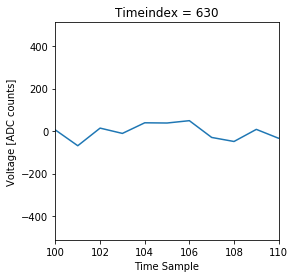

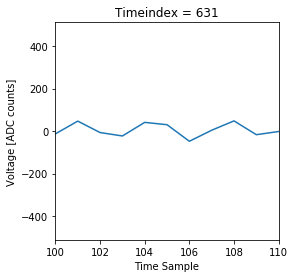

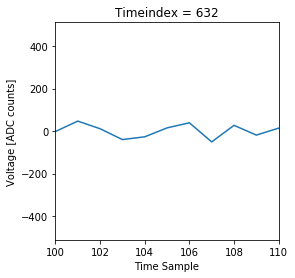

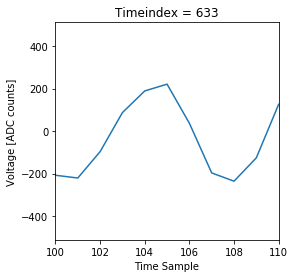

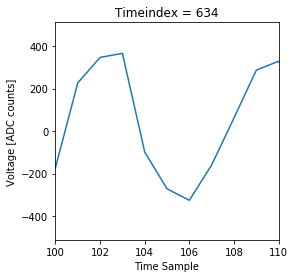

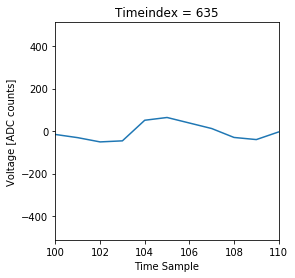

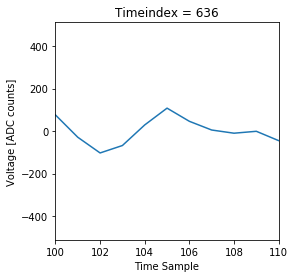

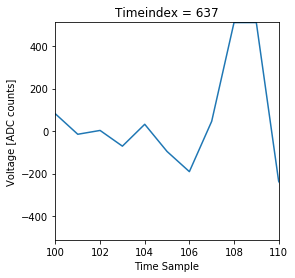

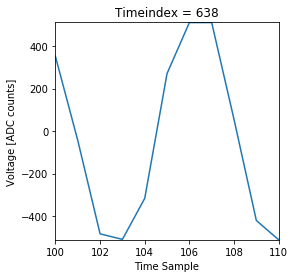

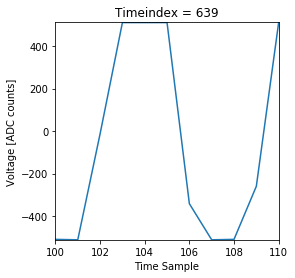

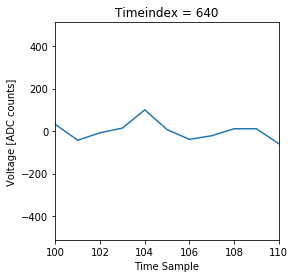

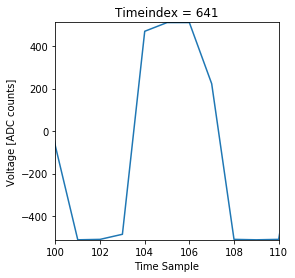

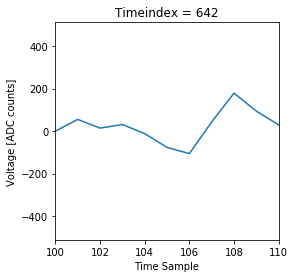

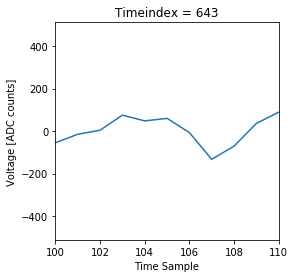

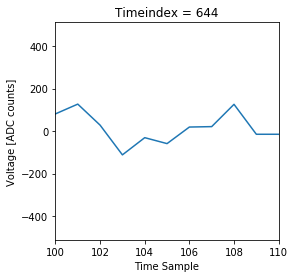

In [28]:
#exploring around 1st really bad time
for t in range(15):
    timeindex=t+630
    plt.figure(figsize=(4,4))
    plt.title("Timeindex = " + str(timeindex))
    plt.xlabel("Time Sample")
    plt.ylabel("Voltage [ADC counts]")
    fname=fnames[timeindex][:-1]
    snapshot=np.load("snapshots/scan24hour/"+fname)
    plt.plot(snapshot[:,antennaindex+4],marker)
    plt.xlim(xmin,xmax)
    plt.ylim(-512,512)


How often are there saturated snapshots?

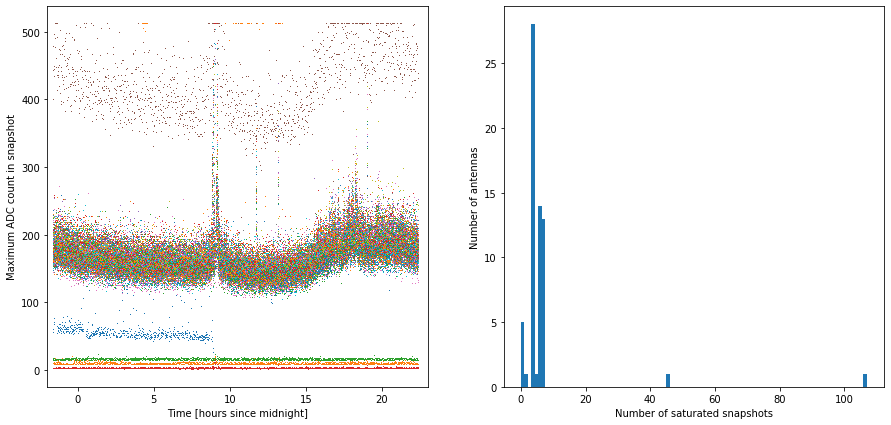

In [29]:
plt.figure(figsize=(15,7))

saturation=[]
plt.subplot(121)
plt.ylabel("Maximum ADC count in snapshot")
plt.xlabel("Time [hours since midnight]")
plt.xlim(-2,23)
for i in range(64):
    plt.plot(hours_since_midnight,maxtimeseries[:,i],',')
    countsat=0
    for j in range(len(maxtimeseries)):
        if maxtimeseries[j,i]>=511:
            countsat+=1
    saturation.append(countsat)

    
plt.subplot(122)
plt.hist(saturation,100)
plt.xlabel("Number of saturated snapshots")
plt.ylabel("Number of antennas")
plt.show()
    

In [30]:
print(saturation[11])
print(saturation[55])

45
107


Most antennas saturate less than 10 times.  The two that are much worse are antenna 55, which has a consistently larger RMS, and antenna 11, which shows up in the kurtosis plots but I'm not sure why it gets worse RFI than the others.

Which antennas are the weird ones? I want to map antenna index to antenna number and polarization in the field.

Antenna indices to look up:

11  --Kurtosis stands out. Saturates more.

55  --large rms

60  --starts out with low power and then recovers

32, 41, 43 --known broken

In [31]:
#This snapshot was recorded sending a constant for each timeseries.  
#I can use this to look up which order the antennas are in
indexsnapshot = np.load("snapshots/single_board_snapshot1631823914.5523858.npy")
for antennaindex in [11, 55, 60, 32, 41, 43]:
    print(antennaindex, indexsnapshot[0,antennaindex+4])



11 4.0
55 56.0
60 51.0
32 47.0
41 38.0
43 36.0


Looking up those numbers in Mark's spreadsheet:

32 which is 47 = 239B  --known broken

41 which is 38 = 235A  --known broken

43 which is 36 = 236A  --known broken

60 which is 51 = 241B  --starts out with low power and then recovers

55 which is 56 = 246A  --large rms

11 which is 4 = 215A   --Kurtosis stands out. Saturates more.


## Filter

/home/ubuntu/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


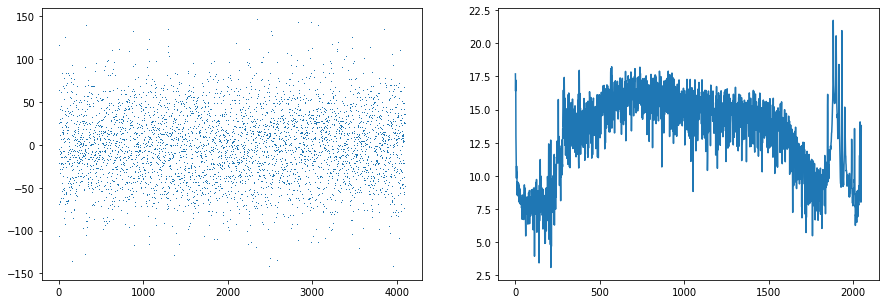

In [32]:
#start with a normal time and antenna
timeindex=700
antennaindex=13
plt.figure(figsize=(15,5))

plt.subplot(121)
with open("ls_snapshots.txt") as f:
    fnames=f.readlines()
fname=fnames[timeindex][:-1]
snapshot=np.load("snapshots/scan24hour/"+fname)
timeseries=snapshot[:,antennaindex+4]
plt.plot(timeseries,',')

plt.subplot(122)
spectrum=np.fft.rfft(timeseries)
plt.plot(np.log(np.square(spectrum)))

#

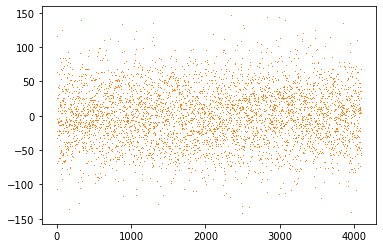

In [33]:
spectrum=np.fft.rfft(timeseries)
plt.plot(timeseries,',')
rtimeseries=np.fft.irfft(spectrum)
plt.plot(rtimeseries,',')

Filter from 21.64306640625 to 81.7626953125MHz


/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/home/ubuntu/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


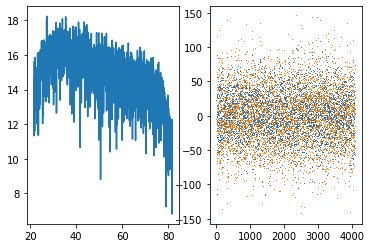

In [34]:
fbins=np.linspace(0,197/2,int(1+4096/2))
print("Filter from " + str(fbins[450]) + ' to ' + str(fbins[1700]) + "MHz" )
tophat=np.zeros(len(spectrum))
tophat[450:1700] = 1
filteredspectrum=tophat*spectrum
filteredtimeseries=np.fft.irfft(filteredspectrum)


plt.figure()
plt.subplot(121)
plt.plot(fbins,np.log(np.square(filteredspectrum)))

plt.subplot(122)
plt.plot(filteredtimeseries,',')
plt.plot(timeseries,',')



In [35]:
Nant = 64
Nsnapshot = 1440

fsdevs=np.zeros((Nsnapshot,Nant))
fskewness=np.zeros((Nsnapshot,Nant))
fkurtosis=np.zeros((Nsnapshot,Nant))
with open("ls_snapshots.txt") as f:
    fnames=f.readlines()
    
for j in range(Nsnapshot):
    fname=fnames[j][:-1]
    snapshot=np.load("snapshots/scan24hour/"+fname)
    for i in range(Nant):
        timeseries=snapshot[:,i+4]
        spectrum=np.fft.rfft(timeseries)
        filteredspectrum=tophat*spectrum
        filteredtimeseries=np.fft.irfft(filteredspectrum)
        fsdevs[j,i]=np.std(filteredtimeseries)
        fskewness[j,i]=st.skew(filteredtimeseries)
        fkurtosis[j,i]=st.kurtosis(filteredtimeseries)

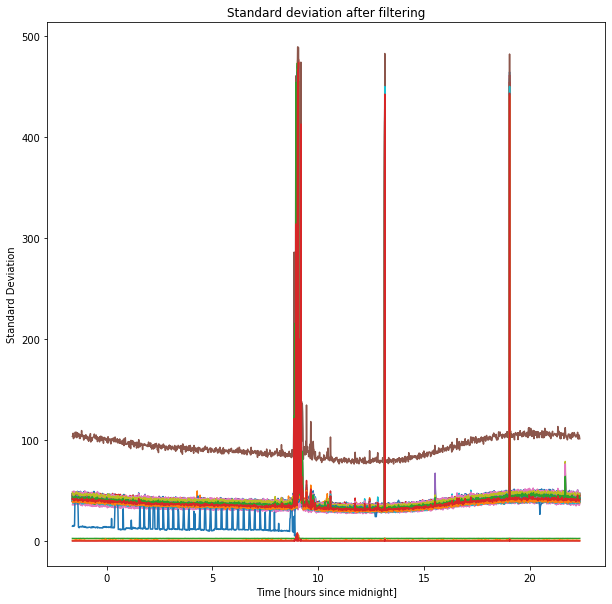

In [36]:
plt.figure(figsize=(10,10))
plt.title("Standard deviation after filtering")
for i in range(64):
    plt.plot(hours_since_midnight,fsdevs[:,i])
    plt.ylabel("Standard Deviation")
    plt.xlabel("Time [hours since midnight]")
plt.show()


Galaxy crossed meridian a few hours before scan ended, which looks like when that peak is.

Zoom in on when behavior of antenna 241B changes: It coincides with the big RFI event.

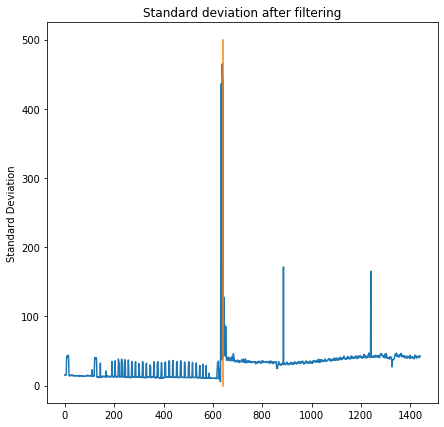

In [37]:
antennaindex=60
plt.figure(figsize=(7,7))
plt.title("Standard deviation after filtering")
plt.plot(fsdevs[:,antennaindex])
plt.ylabel("Standard Deviation")
#make a horizontal line at the time of the big saturation event
plt.plot([641,641],[0,500])
#plt.xlim(600,650)
plt.show()


641 minutes since 10:23 pm is 641-97 minutes past midnight is 9:04 a.m on Sunday September 5.

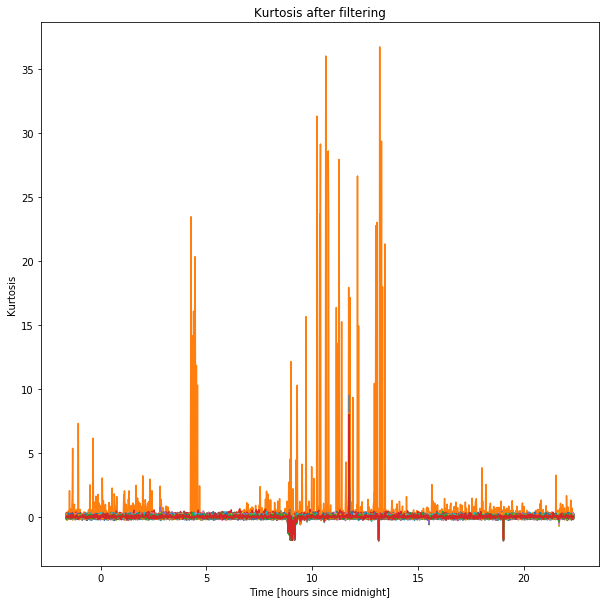

In [38]:
plt.figure(figsize=(10,10))
plt.title("Kurtosis after filtering")
plt.ylabel("Kurtosis")
plt.xlabel("Time [hours since midnight]")
for i in range(64):
    plt.plot(hours_since_midnight,fkurtosis[:,i])
    
plt.show()

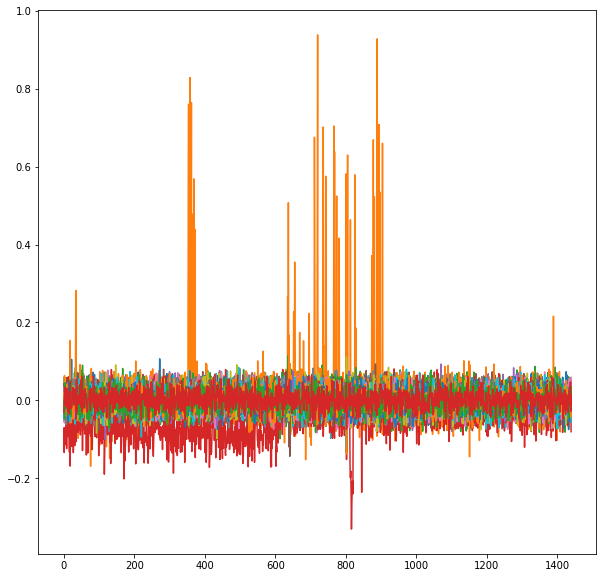

In [39]:
plt.figure(figsize=(10,10))
for i in range(64):
    plt.plot(fskewness[:,i])
plt.show()

## Look for sawtooth pattern Marin observed with AC

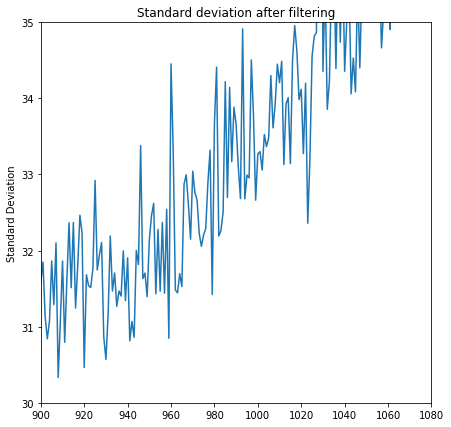

In [45]:
antennaindex=1
plt.figure(figsize=(7,7))
plt.title("Standard deviation after filtering")
plt.plot(fsdevs[:,antennaindex])
plt.ylabel("Standard Deviation")
#make a horizontal line at the time of the big saturation event
plt.plot([641,641],[0,500])
plt.xlim(900,1080)
plt.ylim(30,35)
plt.show()

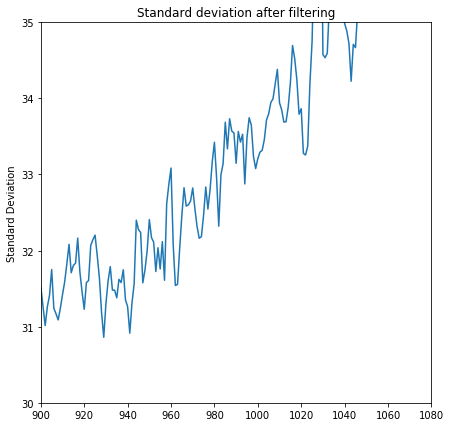

In [52]:
antennaindex=1

stdvs = fsdevs[:,antennaindex]
smoothed = []
for i in range(len(stdvs) - 2):
    smoothed.append((1/3)*(stdvs[i]+stdvs[i+1]+stdvs[i+2]))

plt.figure(figsize=(7,7))
plt.title("Standard deviation after filtering")
plt.plot(smoothed)
plt.ylabel("Standard Deviation")
#make a horizontal line at the time of the big saturation event
plt.plot([641,641],[0,500])
plt.xlim(900,1080)
plt.ylim(30,35)
plt.show()

/home/ubuntu/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0, 100)

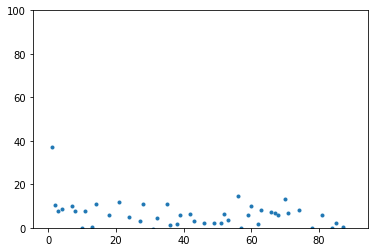

In [56]:
plt.plot(np.fft.rfft(fsdevs[900:1080,antennaindex]),'.')
plt.ylim(0,100)

Next steps:

DOne nice axes

DONE higher order moments

DONE is something saturating at the especially bad time where other channels look like power decreases

DONE (looked up antennas anyway) what is going on with antenna 60 and why does it stop

DONE compare with and without filter

look for 200 kHz tone
